<a href="https://colab.research.google.com/github/mohammad2682/Covid-19/blob/master/CNN-V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
!git clone https://github.com/mohammad2682/Covid19-Dataset

Cloning into 'Covid19-Dataset'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 2523 (delta 6), reused 0 (delta 0), pack-reused 2502
Receiving objects: 100% (2523/2523), 229.95 MiB | 14.16 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (4965/4965), done.


In [ ]:
datadir = "Covid19-Dataset/Covid-19-Dataset/train/COVID/"
Covid=[]
for img in os.listdir(datadir):
    img_array = cv2.imread(os.path.join(datadir,img),0)
    Covid.append([img_array])

(269, 377)


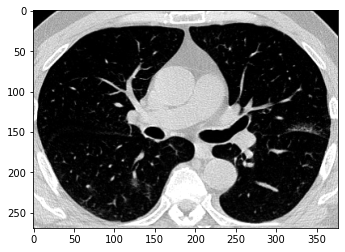

In [ ]:
img=Covid[30]
img=img[0]
print(img.shape)
plt.imshow(img, cmap='gray')

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization, Dropout, Activation

Using TensorFlow backend.


In [20]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (7, 7), input_shape = (128, 128, 1)))
classifier.add(Dropout(0.3))
#classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(64, (7, 7), activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier.add(Conv2D(128, (7, 7), activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(AveragePooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 122, 122, 32)      1600      
_________________________________________________________________
dropout_17 (Dropout)         (None, 122, 122, 32)      0         
_________________________________________________________________
activation_5 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 55, 55, 64)        100416    
_________________________________________________________________
dropout_18 (Dropout)         (None, 55, 55, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 27, 27, 64)       

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( width_shift_range = [0.05, 0.05],
                                    height_shift_range = [0.05,0.05],
                                    zoom_range = 0.1,
                                    horizontal_flip = True)
test_datagen = ImageDataGenerator()
training_set = train_datagen.flow_from_directory('Covid19-Dataset/Covid-19-Dataset/train',
                                                    target_size = (128, 128),
                                                    color_mode="grayscale",
                                                    shuffle=True,
                                                    batch_size = 32,
                                                    class_mode = 'binary')
test_set = test_datagen.flow_from_directory('Covid19-Dataset/Covid-19-Dataset/test',
                                              target_size = (128, 128),
                                              color_mode="grayscale",
                                              shuffle=True,
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


In [21]:
history = classifier.fit_generator(training_set,
                          steps_per_epoch = np.ceil(2000/32),
                          epochs = 20,
                          validation_data = test_set,
                          validation_steps = np.ceil(482/32))

Epoch 1/20
63/63 [==============================] - 15s 236ms/step - loss: 5.7311 - accuracy: 0.5880 - val_loss: 0.6436 - val_accuracy: 0.6120
Epoch 2/20
63/63 [==============================] - 14s 221ms/step - loss: 0.7336 - accuracy: 0.5830 - val_loss: 0.6894 - val_accuracy: 0.4772
Epoch 3/20
63/63 [==============================] - 14s 222ms/step - loss: 0.7934 - accuracy: 0.5410 - val_loss: 0.6883 - val_accuracy: 0.6079
Epoch 4/20
63/63 [==============================] - 14s 222ms/step - loss: 0.7895 - accuracy: 0.5615 - val_loss: 0.6890 - val_accuracy: 0.6598
Epoch 5/20
63/63 [==============================] - 14s 220ms/step - loss: 0.8014 - accuracy: 0.5860 - val_loss: 0.6860 - val_accuracy: 0.6452
Epoch 6/20
63/63 [==============================] - 14s 220ms/step - loss: 0.6873 - accuracy: 0.5935 - val_loss: 0.5547 - val_accuracy: 0.6535
Epoch 7/20
63/63 [==============================] - 14s 219ms/step - loss: 0.8133 - accuracy: 0.6060 - val_loss: 0.6425 - val_accuracy: 0.6328

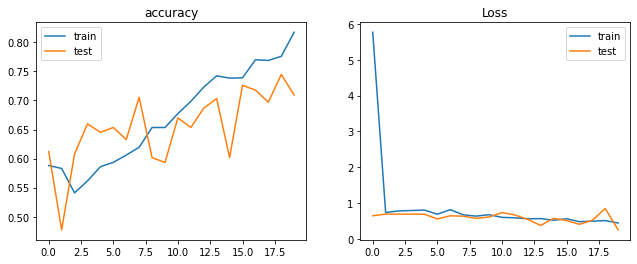

In [30]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.title('Loss')
plt.legend()
plt.subplots_adjust(right = 1.5)
plt.show()

In [59]:
from keras.preprocessing import image
test_image = image.load_img('Covid19-Dataset/Covid-19-Dataset/test/nonCOVID/Non-Covid (857).png', target_size = (128, 128), color_mode = 'grayscale')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

In [60]:
if result[0][0]==1:
  print('non Covid')
else:
  print('Covid')

Covid


In [ ]:
classifier.save('first_RUN.h5')

In [61]:
result = classifier.predict(test_set)

In [68]:
y_test = np.zeros((482,1))
y_test[252:482] = 1

In [72]:
r = abs(np.round(result)-y_test).sum()
(482-r)/482

0.5560165975103735